# IMDB Movie reviews sentiment classification

Check out here: https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification

Keras provides a convenient way to convert positive integer representations of words into a word embedding by an Embedding layer.

In [1]:
import os   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

In [3]:
import tensorflow as tf
#from operator import itemgetter 
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import imdb

In [52]:
# LOAD IMDB DATA
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000,skip_top=20)

In [53]:
type(train_data)

numpy.ndarray

In [54]:
len(train_data)  # Total no of movie reviews

25000

In [55]:
len(train_data[0])  #length of the 1st review

218

In [56]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [57]:
print("train_data ", train_data.shape)
print("train_labels ", train_labels.shape)
print("_"*70)
print("test_data ", test_data.shape)
print("test_labels ", test_labels.shape)
print("_"*70)
print("Maximum value of a word index ")
print(max([max(sequence) for sequence in train_data]))
print("Maximum length num words of review in train ")
print(max([len(sequence) for sequence in train_data]))
print("Minimum length num words of review in train ")
print(min([len(sequence) for sequence in train_data]))

train_data  (25000,)
train_labels  (25000,)
______________________________________________________________________
test_data  (25000,)
test_labels  (25000,)
______________________________________________________________________
Maximum value of a word index 
9999
Maximum length num words of review in train 
2494
Minimum length num words of review in train 
11


In [59]:
print(train_data[0])

[2, 2, 22, 2, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 4536, 1111, 2, 546, 38, 2, 447, 2, 192, 50, 2, 2, 147, 2025, 2, 2, 22, 2, 1920, 4613, 469, 2, 22, 71, 87, 2, 2, 43, 530, 38, 76, 2, 2, 1247, 2, 22, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 5244, 2, 480, 66, 3785, 33, 2, 130, 2, 2, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 2, 22, 2, 215, 28, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 5952, 2, 256, 2, 2, 2, 3766, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 2, 1029, 2, 104, 88, 2, 381, 2, 297, 98, 32, 2071, 56, 26, 141, 2, 194, 7486, 2, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 5535, 2, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 2, 38, 1334, 88, 2, 2, 283, 2, 2, 4472, 113, 103, 32, 2, 2, 5345, 2, 178, 32]


In [60]:
# See an actual review in words
# Reverse from integers to words using the DICTIONARY (given by keras...need to do nothing to create it)

word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [61]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

print(decoded_review)

? ? film ? just brilliant casting location scenery story direction everyone's really suited ? part they played ? you could just imagine being there robert ? ? an amazing actor ? now ? same being director ? father came from ? same scottish island ? myself so ? loved ? fact there ? ? real connection ? ? film ? witty remarks throughout ? film were great ? ? just brilliant so much ? ? bought ? film ? soon ? ? ? released ? ? ? would recommend ? ? everyone ? watch ? ? fly fishing ? amazing really cried at ? end ? ? so sad ? you know what they say if you cry at ? film ? must have been good ? ? definitely ? also ? ? ? two little boy's ? played ? ? ? norman ? paul they were just brilliant children are often left out ? ? ? list ? think because ? stars ? play them all grown up are such ? big profile ? ? whole film but these children are amazing ? should be praised ? what they have done don't you think ? whole story ? so lovely because ? ? true ? ? someone's life after all ? ? shared ? us all


In [62]:
train_labels[0]   # positive

1

In [64]:
# for i in train_data[0]:
#     print(i-3)
# # reverse_word_index.get('everyone')

In [66]:
type(word_index)

dict

In [68]:
len(word_index)

88584

In [162]:
# word_index

In [70]:
len(train_data[0])

218

In [71]:
# VECTORIZE as one cannot feed integers into a NN 
# Encoding the integer sequences into a binary matrix - one hot encoder basically
# From integers representing words, at various lengths - to a normalized one hot encoded tensor (matrix) of 10k columns

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [132]:
train_data.shape

(25000,)

In [134]:
# train_data

In [72]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (25000, 10000)
x_test  (25000, 10000)


In [73]:
len(x_train[0])

10000

In [28]:
x_train[0]

array([0., 0., 1., ..., 0., 0., 0.])

In [74]:
len(x_train)

25000

In [75]:
train_labels[0].dtype

dtype('int64')

In [76]:
# VECTORIZE the labels too - NO INTEGERS only floats into a tensor...(rare exceptions)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

y_train  (25000,)
y_test  (25000,)


In [77]:
y_train[0].dtype

dtype('float32')

In [78]:
y_train[:10]

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

In [79]:
# Set a VALIDATION set

x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

print("x_val ", x_val.shape)
print("partial_x_train ", partial_x_train.shape)
print("y_val ", y_val.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (5000, 10000)
partial_x_train  (20000, 10000)
y_val  (5000,)
partial_y_train  (20000,)


In [93]:
# NN MODEL

# Use of DROPOUT
model = models.Sequential()

# 64 neurons in the 1st hidden layer
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.01), \
                       activation='relu', input_shape=(10000,)))

model.add(layers.Dropout(0.2))
# 32 neurons in the 2nd hidden layer
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.01),\
                       activation='relu'))

model.add(layers.Dropout(0.2))

# The output layer
model.add(layers.Dense(1, activation='sigmoid'))


In [94]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                640064    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


In [98]:
# FIT / TRAIN model

NumEpochs = 10
BatchSize = 128  # variant of minibatch GD

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs,\
                    batch_size=BatchSize, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Epoch 1/10
157/157 [==============================] - 2s 12ms/step - loss: 0.3572 - acc: 0.8946 - val_loss: 0.3873 - val_acc: 0.8826
Epoch 2/10
157/157 [==============================] - 1s 8ms/step - loss: 0.3489 - acc: 0.9000 - val_loss: 0.3952 - val_acc: 0.8834
Epoch 3/10
157/157 [==============================] - 1s 9ms/step - loss: 0.3441 - acc: 0.9034 - val_loss: 0.3955 - val_acc: 0.8784
Epoch 4/10
157/157 [==============================] - 1s 8ms/step - loss: 0.3415 - acc: 0.9047 - val_loss: 0.3995 - val_acc: 0.8764
Epoch 5/10
157/157 [==============================] - 1s 9ms/step - loss: 0.3432 - acc: 0.9032 - val_loss: 0.4600 - val_acc: 0.8484
Epoch 6/10
157/157 [==============================] - 1s 9ms/step - loss: 0.3417 - acc: 0.9045 - val_loss: 0.4036 - val_acc: 0.8722
Epoch 7/10
157/157 [==============================] - 1s 9ms/step - loss: 0.3367 - acc: 0.9081 - val_loss: 0.3944 - val_acc: 0.8760
Epoch 8/10
157/157 [==============================] - 1s 9ms/step - loss: 0

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

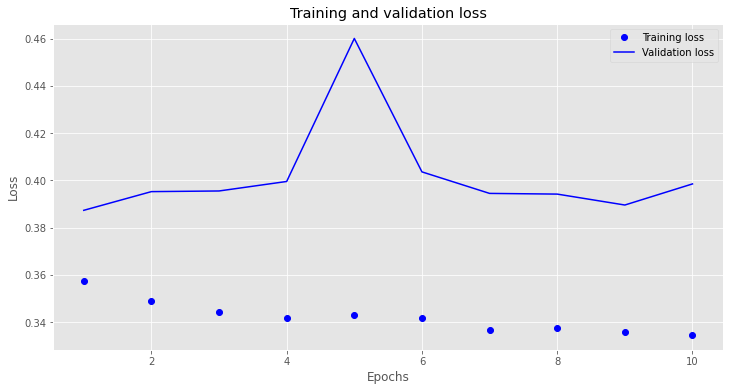

In [99]:
# VALIDATION LOSS curves
plt.figure(figsize=(12,6))
plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

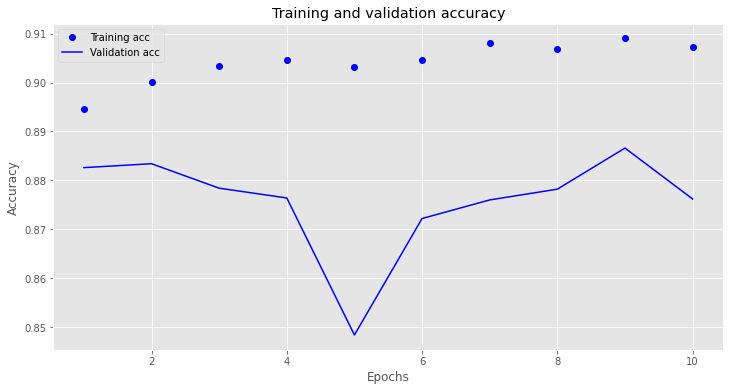

In [100]:
# VALIDATION ACCURACY curves
plt.figure(figsize=(12,6))

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [102]:
pred = model.predict(x_test)

In [103]:
pred[:5]

array([[0.09467237],
       [0.9947403 ],
       [0.21696363],
       [0.8889295 ],
       [0.97236687]], dtype=float32)

In [113]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in test_data[0]])

print(decoded_review)

? please give ? one ? miss ? ? ? ? ? ? rest ? ? cast rendered terrible performances ? show ? flat flat flat ? ? ? don't know how michael madison could have allowed ? one on his plate he almost seemed ? know ? wasn't going ? work out ? his performance ? quite ? so all you madison fans give ? ? miss


In [114]:
y_test[0]

0.0

In [115]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in test_data[1]])
print(decoded_review)

? ? film requires ? lot ? patience because ? focuses on mood ? character development ? plot ? very simple ? many ? ? scenes take place on ? same set ? frances ? ? sandy dennis character apartment but ? film builds ? ? disturbing climax ? ? ? characters create an atmosphere ? ? sexual tension ? psychological ? it's very interesting ? robert altman directed ? considering ? style ? structure ? his other films still ? trademark altman audio style ? evident here ? there ? think what really makes ? film work ? ? brilliant performance by sandy dennis it's definitely one ? her darker characters but she plays ? so perfectly ? convincingly ? it's scary michael burns does ? good job ? ? mute young man regular altman player michael murphy has ? small part ? ? moody set fits ? content ? ? story very well ? short ? movie ? ? powerful study ? loneliness sexual ? ? desperation be patient ? up ? atmosphere ? pay attention ? ? wonderfully written script ? ? ? praise robert altman ? ? one ? his many film

In [116]:
y_test[1]

1.0

In [112]:
# pred = model.predict_proba(x_test)

In [104]:
pred[:5]

array([[0.09467237],
       [0.9947403 ],
       [0.21696363],
       [0.8889295 ],
       [0.97236687]], dtype=float32)

In [107]:
thresh = 0.5
new_labels = []
for proba in pred:
    if proba > thresh:
        new_labels.append(1)
    else: new_labels.append(0)


In [108]:
new_labels[:10]

[0, 1, 0, 1, 1, 1, 1, 0, 1, 1]

In [110]:
y_test[:10] 

array([0., 1., 1., 0., 1., 1., 1., 0., 0., 1.], dtype=float32)

## Exercise

In [156]:
# test_case1 = 'This movie is awesome brilliant acting and engaging story'
test_case1 = 'This movie is just so boring'

In [157]:
test_case1_lst = []
for word in test_case1.lower().split():
    if word in word_index.keys():
        test_case1_lst.append(word_index[word])
    else: test_case1_lst.append(2)

In [158]:
test_case1_lst = np.array([test_case1_lst])
test_case1_lst.shape

(1, 6)

In [159]:
test_case1_vect = vectorize_sequences(test_case1_lst)
test_case1_vect

array([[0., 0., 0., ..., 0., 0., 0.]])

In [160]:
test_case1_vect.shape

(1, 10000)

In [161]:
model.predict(test_case1_vect)

array([[0.61592865]], dtype=float32)

# Enhancements in the Neural Network

1. Use CNN for featue extraction from the vectorized documents
2. Use Embedding Layer to get word embeddings for the vocab words. Then use the WE as features
3. Use RNN for final model 